<a href="https://colab.research.google.com/github/fbeilstein/topological_data_analysis/blob/master/lecture_14_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [ARTICLE](https://geometrica.saclay.inria.fr/data/Steve.Oudot/clustering/jacm_oudot.pdf)
- [SIMPLER ARTICLE](https://geometrica.saclay.inria.fr/team/Steve.Oudot/papers/cgos-pbc-09/cgos-pbcrm-11.pdf)
- [Fuzzy Clustering](https://arxiv.org/pdf/1406.7130)
- [Implementation](https://github.com/xetaxe/ToMATo-Notebook/blob/master/Guide%20ToMATo.ipynb)
- [GUDHI docs](https://gudhi.inria.fr/python/latest/clustering.html)

### **Clustering**

**Input:**  
A simple graph $ G $ with $ n $ vertices, an $ n $-dimensional vector $ \tilde{f} $, and a real parameter $ \tau \geq 0 $.

**Algorithm:**

1. Sort the vertex indices $ \{1, 2, \ldots, n\} $ so that  
   $$
   \tilde{f}(1) \geq \tilde{f}(2) \geq \cdots \geq \tilde{f}(n)
   $$
2. Initialize a union-find data structure $ \mathcal{U} $, and two vectors $ g $, $ r $ of size $ n $.

3. For $ i = 1 $ to $ n $:  
   - Let $ \mathcal{N} $ be the set of neighbors of $ i $ in $ G $ that have indices lower than $ i $.
   - **If** $ \mathcal{N} = \emptyset $:  
     - // vertex $ i $ is a peak of $ \tilde{f} $ within $ G $  
     - Create a new entry $ e $ in $ \mathcal{U} $ and attach vertex $ i $ to it.  
     - $ r(e) \leftarrow i $  
       // $ r(e) $ stores the root vertex associated with entry $ e $
   - **Else**:
     - // vertex $ i $ is not a peak of $ \tilde{f} $ within $ G $  
     - $ g(i) \leftarrow \arg\max_{j \in \mathcal{N}} \tilde{f}(j) $  
       // $ g(i) $ stores the approximate gradient at vertex $ i $  
     - $ e_i \leftarrow \mathcal{U}.\text{find}(g(i)) $  
     - Attach vertex $ i $ to the entry $ e_i $
     - **For each** $ j \in \mathcal{N} $:
       - $ e \leftarrow \mathcal{U}.\text{find}(j) $
       - **If** $ e \neq e_i $ **and**  
         $$
         \min\{\tilde{f}(r(e)), \tilde{f}(r(e_i))\} < \tilde{f}(i) + \tau
         $$
         **then:**
         - $ \mathcal{U}.\text{union}(e, e_i) $
         - $ r(e \cup e_i) \leftarrow \arg\max_{r(e), r(e_i)} \tilde{f} $
         - $ e_i \leftarrow e \cup e_i $

**Output:**  
The collection of entries $ e $ of $ \mathcal{U} $ such that  
$$
\tilde{f}(r(e)) \geq \tau
$$


In [2]:
!pip install gudhi

####Half-moons

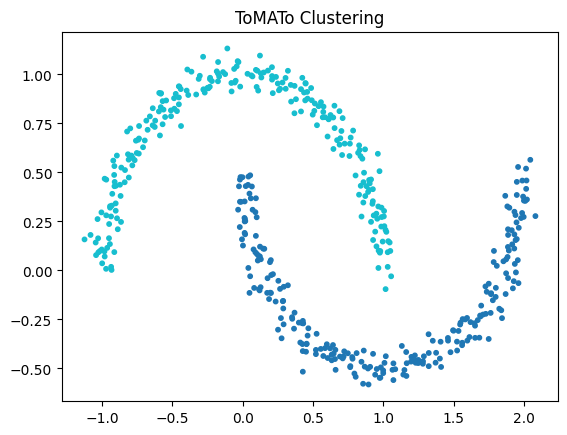

In [3]:
import numpy as np
from gudhi.clustering.tomato import Tomato
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate toy data
X, _ = make_moons(n_samples=500, noise=0.05)

# Apply ToMATo clustering
tomato = Tomato()
tomato.fit(X)
tomato.n_clusters_ = 2

# Plot result
plt.scatter(X[:, 0], X[:, 1], c=tomato.labels_, cmap='tab10', s=10)
plt.title("ToMATo Clustering")
plt.show()


####Rings

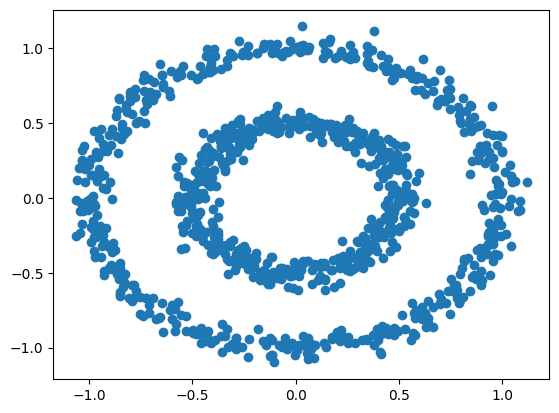

In [12]:
from sklearn import manifold, datasets
p2, y = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)

fig, ax = plt.subplots();
ax.cla()
ax.scatter(*zip(*p2));
plt.draw()
plt.show()

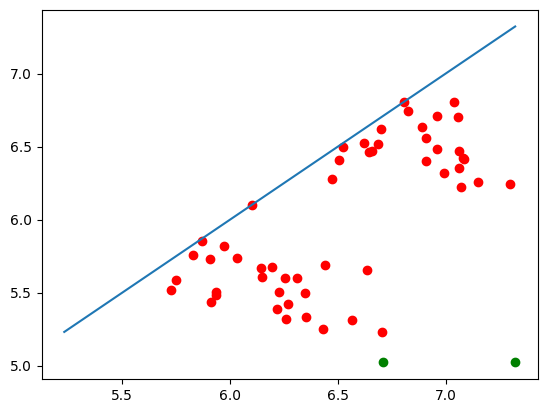

In [17]:
from gudhi.clustering.tomato import Tomato

t = Tomato()
t.fit(p2)
t.plot_diagram()

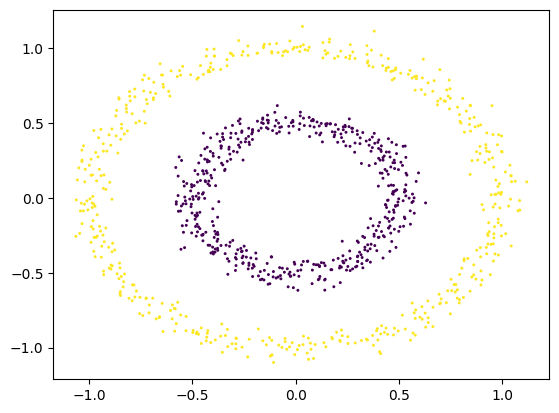

In [20]:
t.n_clusters_=2
plt.scatter(p2[:,0], p2[:,1],marker='.',s=5,c=t.labels_)
plt.show()

####Noisy half-moons

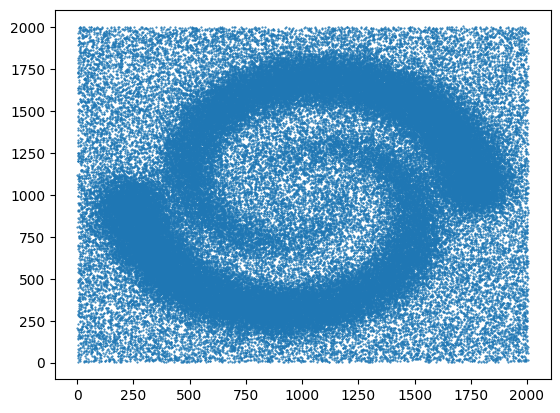

In [4]:
import gudhi
from gudhi.datasets.remote import fetch_spiral_2d
data = fetch_spiral_2d()
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],marker='.',s=1)
plt.show()

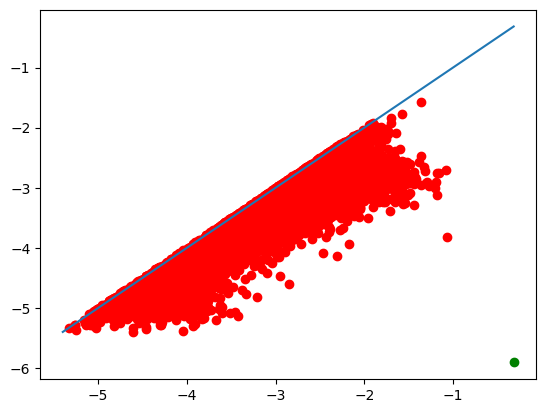

In [5]:
from gudhi.clustering.tomato import Tomato
t = Tomato()
t.fit(data)
t.plot_diagram()

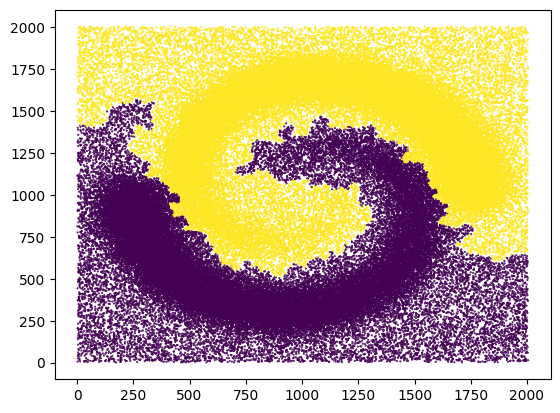

In [6]:
t.n_clusters_=2
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.labels_)
plt.show()

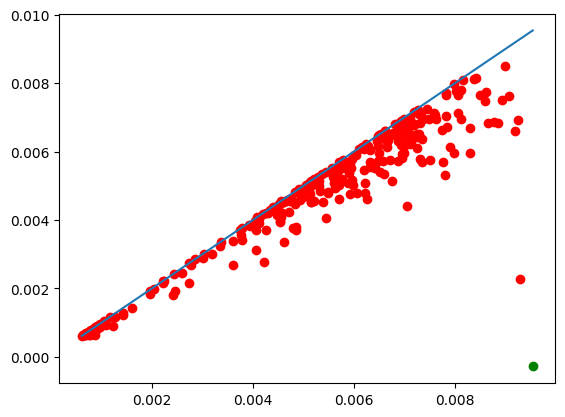

In [7]:
t = Tomato(density_type='DTM', k=100)
t.fit(data)
t.plot_diagram()

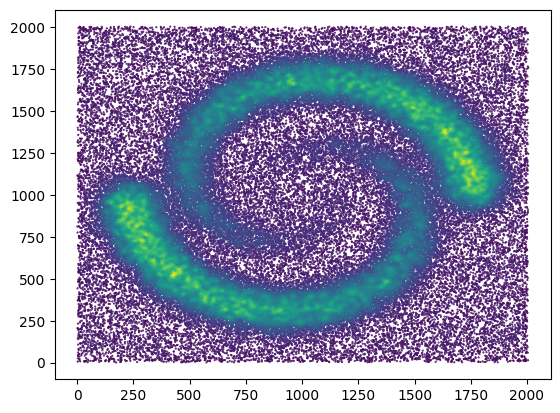

In [8]:
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.weights_)
plt.show()

####Swiss Roll

In [48]:
import random as rd
import numpy as np
from sklearn.datasets import make_swiss_roll
import plotly.graph_objects as go

points_cube = 1000
points_sphere = 800
points_sr = 8000
points_noise = 2000

# Cube points
X1 = np.array([[rd.uniform(-2, 2), rd.uniform(-2, 2), rd.uniform(-2, 2)] for _ in range(points_cube)])

# Sphere shell points
X2 = np.zeros((points_sphere, 3))
for i in range(points_sphere):
  x, y, z = rd.uniform(-1,1), rd.uniform(-1,1), rd.uniform(-1,1)
  norm = np.sqrt(x**2 + y**2 + z**2) + 1e-8  # avoid division by zero
  X2[i] = [12 + 3*x/norm, 15 + 3*y/norm, -4 + 3*z/norm]

# Swiss roll
X4, _ = make_swiss_roll(n_samples=points_sr, noise=.05)

# Random noise
X5 = np.array([[rd.uniform(-10, 15), rd.uniform(-5, 20), rd.uniform(-10, 15)] for _ in range(points_noise)])

# Combine all
X = np.concatenate((X1, X2, X4, X5))

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
  x=X[:, 0],
  y=X[:, 1],
  z=X[:, 2],
  mode='markers',
  marker=dict(
    size=2,
    color='red',
    opacity=0.8
  )
)])

# Set camera view similar to view_init(7, -70)
fig.update_layout(
  scene_camera=dict(eye=dict(x=2, y=0.2, z=1.8)),
  scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z',
  ),
  margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()


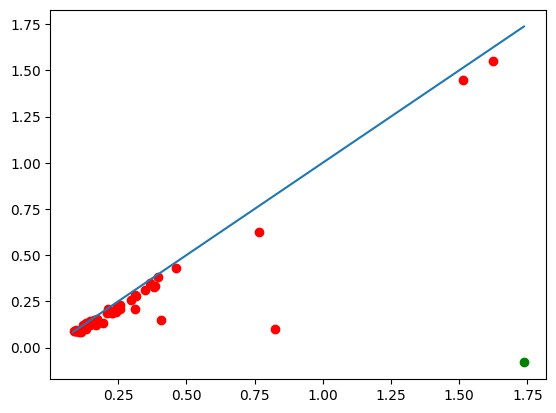

In [31]:
t = Tomato(density_type='DTM', k=100)
t.fit(X)
t.plot_diagram()

In [32]:
labels = t.labels_

import plotly.express as px
import pandas as pd

# Create a DataFrame for easier plotting
df = pd.DataFrame(X, columns=['x', 'y', 'z'])
df['label'] = labels

fig = px.scatter_3d(
    df, x='x', y='y', z='z',
    color='label',  # this automatically assigns different colors
    color_continuous_scale='Viridis',  # or use 'Jet', 'Rainbow', etc.
    opacity=0.7,
    size_max=2
)

fig.update_traces(marker=dict(size=2))
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene_camera=dict(eye=dict(x=2, y=0.2, z=1.8)),
)
fig.show()


####Sphere

In [83]:
import numpy as np
import plotly.express as px
import pandas as pd

# Sampling points on a squashed sphere
def sample_spherical(npoints):
  vec = []
  vec.append(-0.5 + 1 / (1 + np.exp(-5 * np.random.uniform(-1, 1, npoints))))
  vec.append(-0.5 + 1 / (1 + np.exp(-5 * np.random.uniform(-1, 1, npoints))))
  vec.append(-0.5 + 1 / (1 + np.exp(-5 * np.random.uniform(-1, 1, npoints))))
  vec = np.array(vec)
  vec /= np.linalg.norm(vec, axis=0)  # Normalize each vector
  return vec

# Generate points
npoints = 6000
points = sample_spherical(npoints)

# Create DataFrame for Plotly
df = pd.DataFrame({
  'x': points[0, :],
  'y': points[1, :],
  'z': points[2, :]
})

# Plot with Plotly
fig = px.scatter_3d(df, x='x', y='y', z='z',
                    opacity=0.7,
                    size_max=2)

fig.update_traces(marker=dict(size=2, color='blue'))
fig.update_layout(
    scene_camera=dict(eye=dict(x=2, y=0.2, z=1.8)),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()


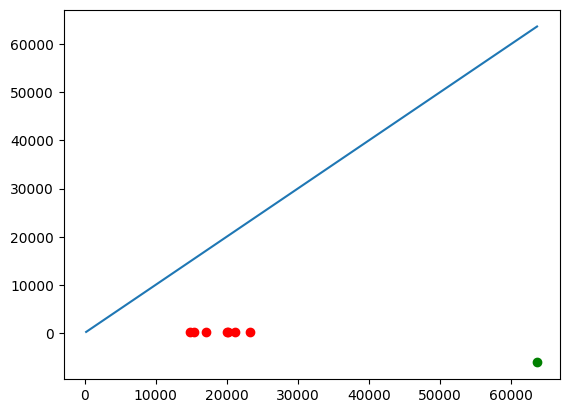

In [81]:
t = Tomato(density_type='DTM', k=100)
t.fit(points.T)
t.plot_diagram()

In [82]:

labels = t.labels_

# Step 3: Prepare data for Plotly
df = pd.DataFrame({
    'x': points[0, :],
    'y': points[1, :],
    'z': points[2, :],
    'cluster': labels.astype(str)  # Convert to string for categorical coloring
})

# Step 4: Plot with Plotly
fig = px.scatter_3d(df, x='x', y='y', z='z',
                    color='cluster',
                    opacity=0.7,
                    title="ToMaTo Clustering Result")

fig.update_traces(marker=dict(size=3))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

#### 3D Plot

In [86]:
import numpy as np
import plotly.graph_objects as go

def f(x, y):
  return 2 + np.sin(0.5 * (x + y)) + np.cos(0.5 * (x - y))

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Viridis')])

fig.update_layout(
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    ),
    title='3D Contour Surface',
    autosize=False,
    width=800,
    height=600,
)

fig.show()


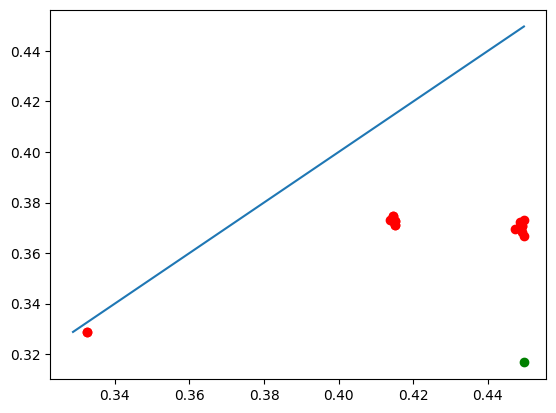

In [112]:
import numpy as np
from gudhi.clustering.tomato import Tomato

points = np.stack([X.ravel(), Y.ravel(), Z.ravel()], axis=1)
tomato = Tomato(density_type="DTM", k=20)
tomato.fit(points)
tomato.plot_diagram()

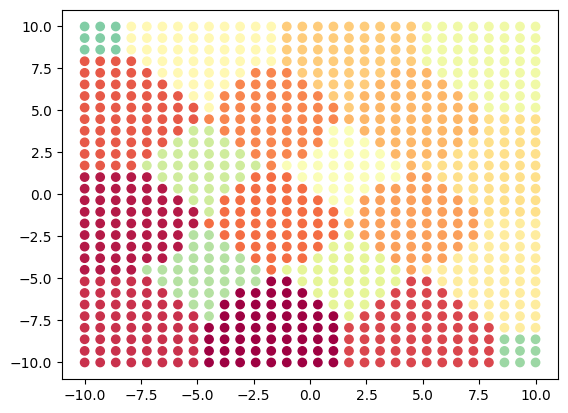

In [113]:
norm = plt.Normalize(vmin=0, vmax=25)

fig, ax = plt.subplots();

cmap = plt.cm.Spectral;
ax.cla()
ax.scatter(points[:,0], points[:,1], c=cmap(norm(tomato.labels_)));

In [115]:
import pandas as pd
import plotly.express as px

# Build DataFrame from point cloud and cluster labels
df = pd.DataFrame({
    "x": points[:, 0],
    "y": points[:, 1],
    "z": points[:, 2],
    "cluster":  tomato.labels_
})

# 3D scatter plot with Plotly
fig = px.scatter_3d(df, x="x", y="y", z="z", color="cluster", opacity=0.8)
fig.show()
